**CUSTOMER CHURN PROBLEM**

**INTRODUCTION**

Customer CHURN, customer attrition or customer turnover, refers to the phenomenon where customers or clients discontinue their relationship with a company or business or the loss of customers, is a significant concern for businesses across various industries.Churn can occur for various reasons, including dissatisfaction with the product or service, better offers from competitors, changes in personal or business needs, or lack of engagement.

Understanding the factors that contribute to churn and being able to predict customer behavior can help businesses implement proactive strategies to retain customers and improve overall customer satisfaction. In this analysis, we aim to explore customer churn using a dataset provided in CSV format. We will apply machine learning techniques, specifically a decision tree classifier, to predict customer churn based on various customer attributes. The ultimate goal is to empower businesses with insights that enable them to identify potential churners and take appropriate actions to mitigate churn.






**DATA UNDERSTANDING AND PREPROCESSING**

1.Loading the Dataset:
  We begin the analysis by loading the dataset into the Google Colab environment using the file upload feature.

2.Exploratory Data Analysis (EDA)
  We conduct exploratory data analysis (EDA) to gain a better understanding of the dataset which includes examining the first few rows of the dataset, checking for missing values, and visualizing central tendency and dispersion measures.

3.Data Visualization
  We utilize various data visualization techniques such as histograms, boxplots, and pairplots to visualize the distribution of variables and explore relationships between them.

**VARIABLES DESCRIPTION**

cust_id: Customer ID or unique identifier for each customer

region:  Region where the customer resides

tenure: Number of months the customer has been with the company

age: Age of the customer

marital: Marital status of the customer (e.g., married, single)

address: Number of years the customer has lived at their current address

income: Income level of the customer

ed: Education level of the customer

employ: Number of years the customer has been employed

retire: Indicator of whether the customer is retired

gender: Gender of the customer

reside: Number of people residing in the customer's household

tollfree: Indicator of whether the customer has a toll-free service

equip: Indicator of whether the customer has equipment

callcard: Indicator of whether the customer has a calling card

wireless: Indicator of whether the customer has wireless service

longmon: Monthly long distance call charges

tollmon: Monthly toll-free call charges

equipmon: Monthly equipment charges

cardmon: Monthly calling card charges

wiremon: Monthly wireless service charges

longten: Total long distance call charges over the customer's tenure

tollten: Total toll-free call charges over the customer's tenure

equipten: Total equipment charges over the customer's tenure

cardten: Total calling card charges over the customer's tenure

wireten: Total wireless service charges over the customer's tenure

multline: Indicator of whether the customer has multiple lines

voice: Indicator of whether the customer has a voice mail service

pager: Indicator of whether the customer has a pager service

internet: Indicator of whether the customer has internet service

callid: Indicator of whether the customer has caller ID

callwait: Indicator of whether the customer has call waiting

forward: Indicator of whether the customer has call forwarding

confer: Indicator of whether the customer has conference calling

ebill: Indicator of whether the customer receives electronic bills

loglong: Log of monthly long distance call charges

lninc: Log of customer income

custcat: Customer category

churn: Indicator of whether the customer churned

TARGER VARIABLE: **Churn**

**UPLOAD AND CLEAN DATA**

**Step 1**: Load the Churn dataset to Google Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**Step 2**: Import the necessary python libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

**Step 3**: Read the data from the CutomerChurnData.csv file

In [ ]:
churn_data = pd.read_csv("/content/drive/MyDrive/CutomerChurnData.csv")
churn_data

cust_id region  tenure  age marital  address  income  ed  employ retire  \
0    C00124     R2      13   44       Y        9      64  E4       5      N   
1    C00125     R3      68   52       Y       24     116  E1      29      N   
2    C00126     R2      23   30       Y        9      30  E1       2      N   
3    C00127     R3      45   22       Y        2      19  E2       4      N   
4    C00128     R3      45   59       Y        7     166  E4      31      N   
..      ...    ...     ...  ...     ...      ...     ...  ..     ...    ...   
995  C01119     R1      50   43       N        6      27  E3       4      N   
996  C01120     R1      34   52       Y        2     106  E2      19      N   
997  C01121     R1      15   46       Y       17      63  E5       1      N   
998  C01122     R1       7   34       N        2      22  E5       5      N   
999  C01123     R3      70   49       N       18      87  E2      22      N   

     ... internet  callid callwait forward confer ebill  loglong  lninc  \
0    ...        N       N        N       Y      N     N    1.308  4.159   
1    ...        N       Y        Y       N      Y     N    2.899  4.754   
2    ...        N       Y        N       Y      Y     N    1.841  3.401   
3    ...        Y       N        Y       N      N     Y    2.389  2.944   
4    ...        N       Y        Y       Y      Y     N    2.277  5.112   
..   ...      ...     ...      ...     ...    ...   ...      ...    ...   
995  ...        N       Y        Y       Y      Y     N    2.708  3.296   
996  ...        Y       Y        N       Y      Y     N    1.599  4.663   
997  ...        Y       Y        N       Y      Y     Y    1.308  4.143   
998  ...        N       N        N       N      N     N    1.537  3.091   
999  ...        N       Y        Y       Y      Y     N    3.243  4.466   

     custcat  churn  
0         C1      Y  
1         C3      N  
2         C3      N  
3         C2      Y  
4         C3      N  
..       ...    ...  
995       C3      N  
996       C3      N  
997       C4      Y  
998       C1      N  
999       C3      N  

[1000 rows x 39 columns]

**Step 4**: DIsplay all the attributes of the Churn dataset

In [ ]:
churn_data.keys()

Index(['cust_id', 'region', 'tenure', 'age', 'marital', 'address', 'income',
       'ed', 'employ', 'retire', 'gender', 'reside', 'tollfree', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'equipten', 'cardten', 'wireten',
       'multline', 'voice', 'pager', 'internet', 'callid', 'callwait',
       'forward', 'confer', 'ebill', 'loglong', 'lninc', 'custcat', 'churn'],
      dtype='object')

**Step 5**: Select only the required columns for effective decision making

In [ ]:
desired_columns = ['tenure', 'age', 'churn', 'income', 'tollfree', 'equip','callcard',
'wireless', 'internet', 'multline', 'employ', 'retire', 'ed']
churn_desired = churn_data [desired_columns]

**Step 6**: Examine the first few rows of the dataset to have a better understanding

In [ ]:
print(churn_data.head())

  cust_id region  tenure  age marital  address  income  ed  employ retire  \
0  C00124     R2      13   44       Y        9      64  E4       5      N   
1  C00125     R3      68   52       Y       24     116  E1      29      N   
2  C00126     R2      23   30       Y        9      30  E1       2      N   
3  C00127     R3      45   22       Y        2      19  E2       4      N   
4  C00128     R3      45   59       Y        7     166  E4      31      N   

   ... internet  callid callwait forward confer ebill  loglong  lninc  \
0  ...        N       N        N       Y      N     N    1.308  4.159   
1  ...        N       Y        Y       N      Y     N    2.899  4.754   
2  ...        N       Y        N       Y      Y     N    1.841  3.401   
3  ...        Y       N        Y       N      N     Y    2.389  2.944   
4  ...        N       Y        Y       Y      Y     N    2.277  5.112   

   custcat  churn  
0       C1      Y  
1       C3      N  
2       C3      N  
3       C2      Y 

**Step 7**: Check for any missing values

In [ ]:
print(churn_data.isnull().sum())

cust_id     0
region      0
tenure      0
age         0
marital     0
address     0
income      0
ed          0
employ      0
retire      0
gender      0
reside      0
tollfree    0
equip       0
callcard    0
wireless    0
longmon     0
tollmon     0
equipmon    0
cardmon     0
wiremon     0
longten     0
tollten     0
equipten    0
cardten     0
wireten     0
multline    0
voice       0
pager       0
internet    0
callid      0
callwait    0
forward     0
confer      0
ebill       0
loglong     0
lninc       0
custcat     0
churn       0
dtype: int64


**Step 8**: Examine the data types of the variables involved

In [ ]:
churn_data.dtypes

cust_id      object
region       object
tenure        int64
age           int64
marital      object
address       int64
income        int64
ed           object
employ        int64
retire       object
gender       object
reside        int64
tollfree     object
equip        object
callcard     object
wireless     object
longmon     float64
tollmon     float64
equipmon    float64
cardmon     float64
wiremon     float64
longten     float64
tollten     float64
equipten    float64
cardten       int64
wireten     float64
multline     object
voice        object
pager        object
internet     object
callid       object
callwait     object
forward      object
confer       object
ebill        object
loglong     float64
lninc       float64
custcat      object
churn        object
dtype: object

**Step 9**:Change the categorical variables as type category

In [ ]:
churn_data['retire'] = churn_data['retire'].astype('category')
churn_data['tollfree'] = churn_data['tollfree'].astype('category')
churn_data['equip'] = churn_data['equip'].astype('category')
churn_data['callcard'] = churn_data['callcard'].astype('category')
churn_data['wireless'] = churn_data['wireless'].astype('category')
churn_data['multline'] = churn_data['multline'].astype('category')
churn_data['internet'] = churn_data['internet'].astype('category')
churn_data['churn'] = churn_data['churn'].astype('category')

**Step 10**:Examine the data types of variables after changing the categorical variables as type category.

In [ ]:
churn_data.dtypes

cust_id       object
region        object
tenure         int64
age            int64
marital       object
address        int64
income         int64
ed            object
employ         int64
retire      category
gender        object
reside         int64
tollfree    category
equip       category
callcard    category
wireless    category
longmon      float64
tollmon      float64
equipmon     float64
cardmon      float64
wiremon      float64
longten      float64
tollten      float64
equipten     float64
cardten        int64
wireten      float64
multline    category
voice         object
pager         object
internet    category
callid        object
callwait      object
forward       object
confer        object
ebill         object
loglong      float64
lninc        float64
custcat       object
churn       category
dtype: object

**Step 11**:Examining the central tendency and dispersion measures using visualization technique Histogram

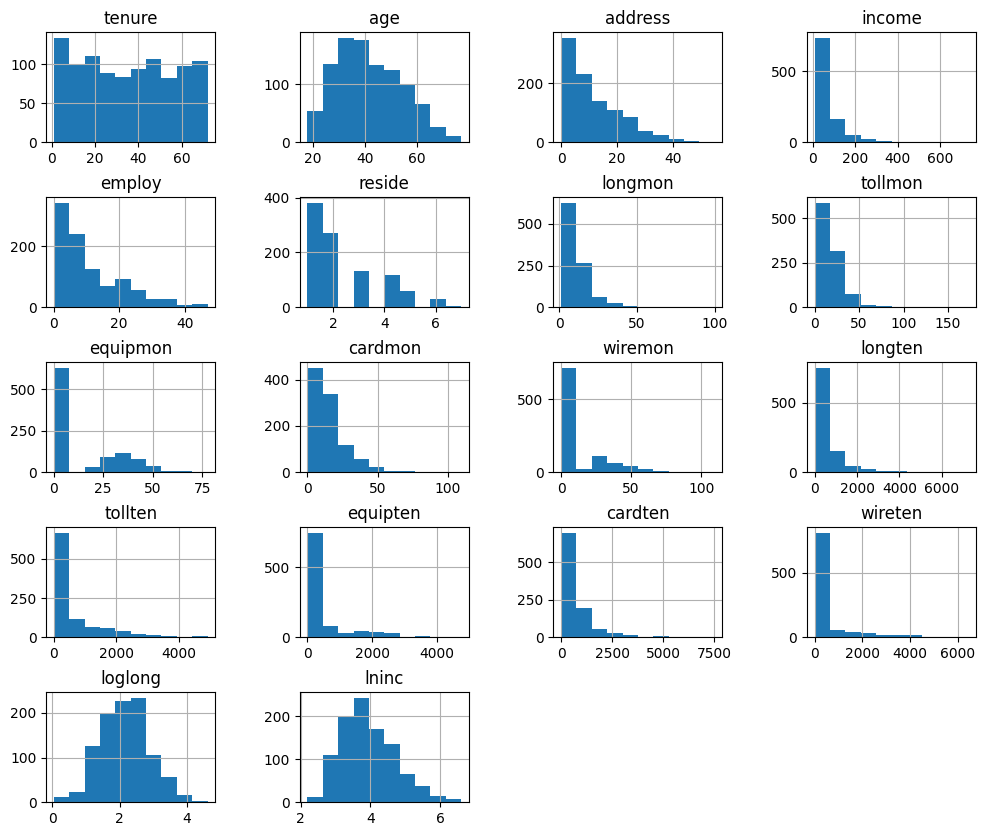

In [ ]:
churn_data.hist(figsize=(12,10))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

**Step 12**:Examining the central tendency and dispersion measures using visualization technique Boxplot

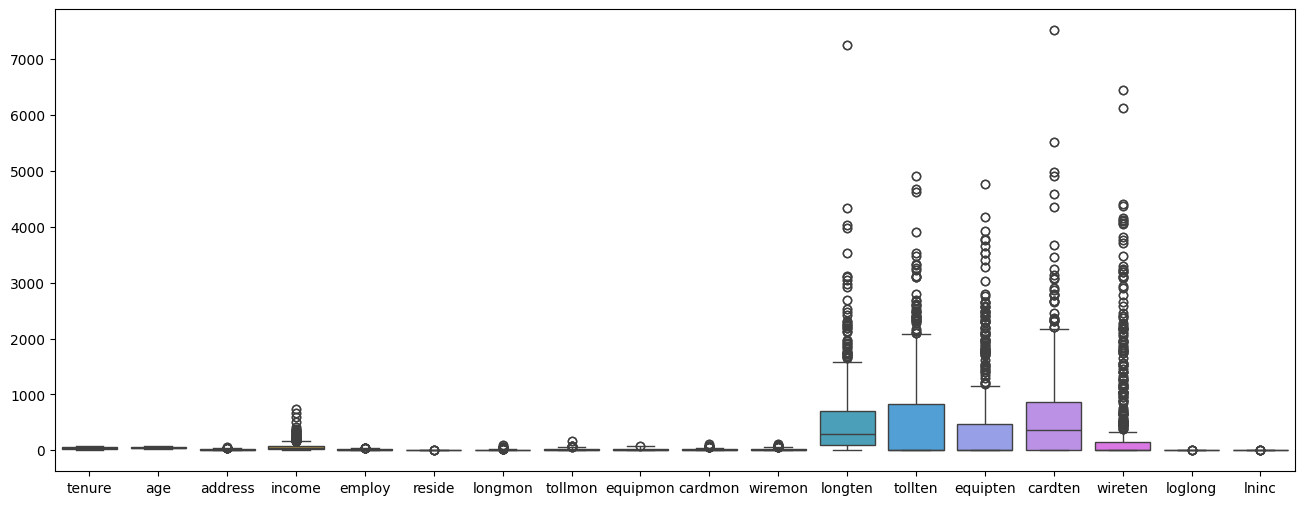

In [ ]:
plt.figure(figsize=(16,6))
sns.boxplot(data=churn_data)
plt.show()

**Step 13**:Examining the central tendency and dispersion measures using visualization technique Pairplot.

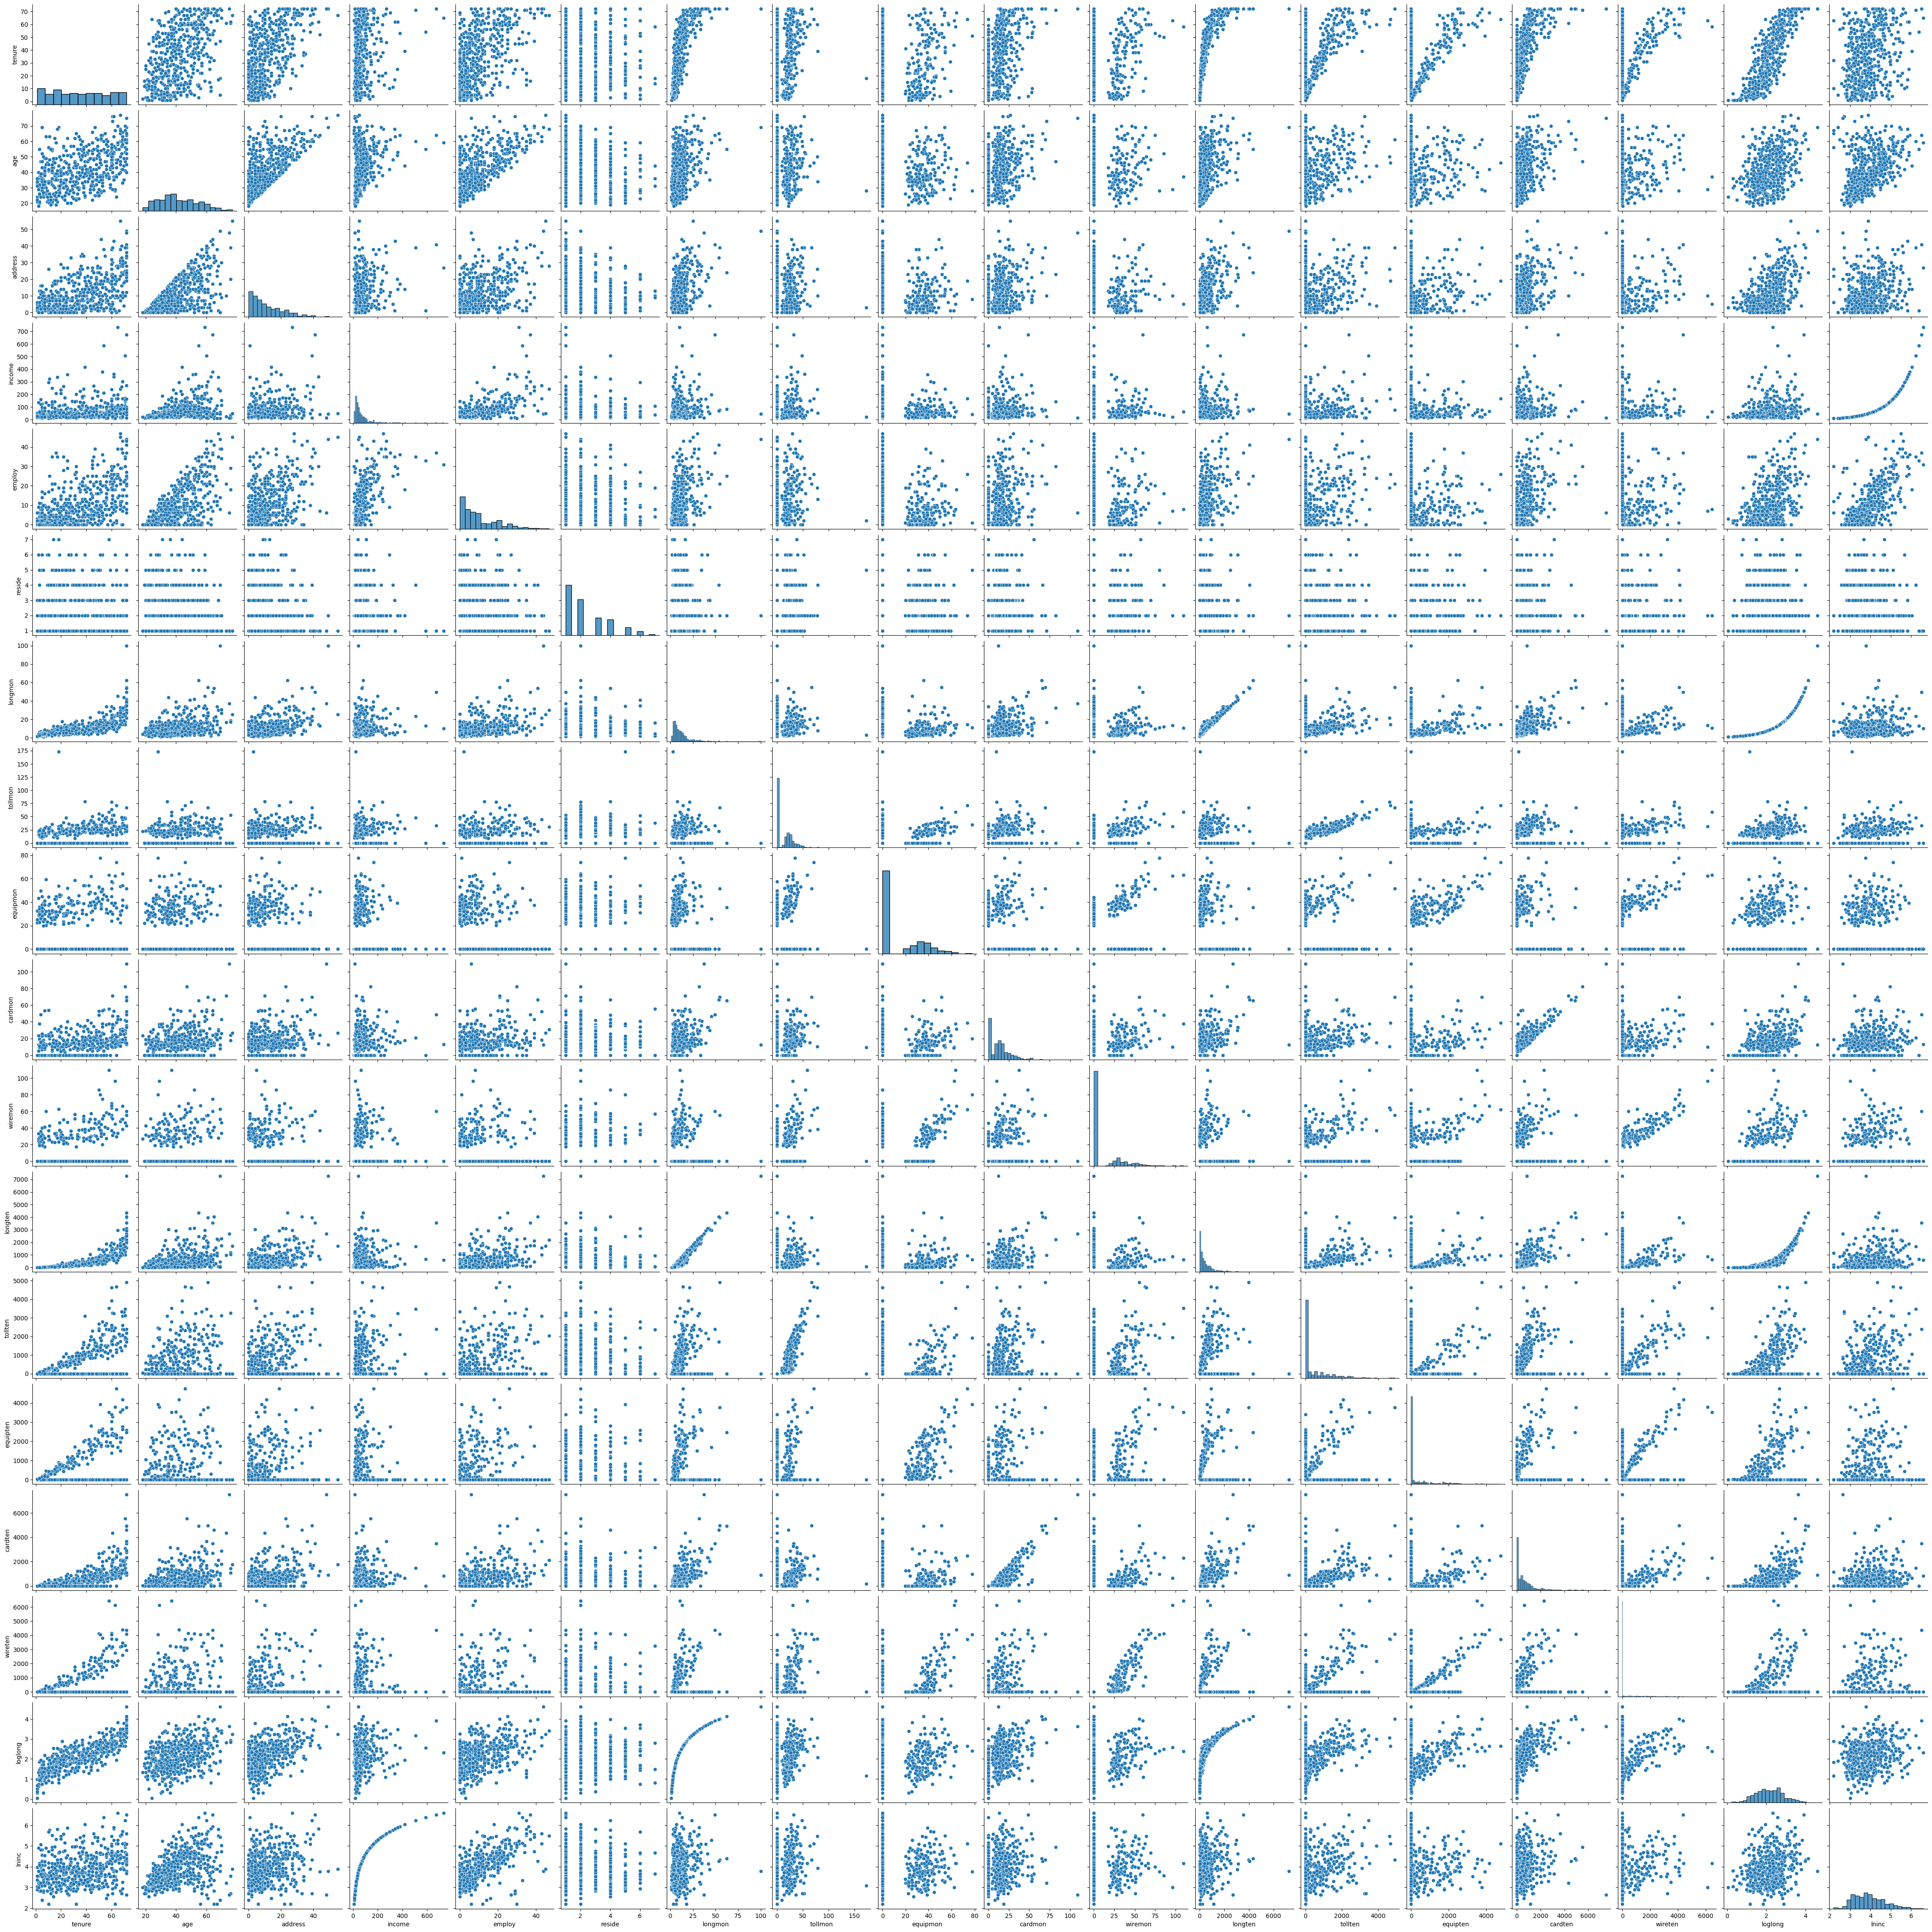

In [ ]:
sns.pairplot(churn_data)
plt.show()

**PARTITION THE DATASET FOR DECISION TREE MODEL**

**Step 15**: Create the dummy variables

In [ ]:
churn_data = pd.get_dummies(churn_data, columns=['tollfree', 'equip','callcard',
'wireless', 'internet', 'multline', 'retire'], drop_first=True)
churn_data

cust_id region  tenure  age marital  address  income  ed  employ gender  \
0    C00124     R2      13   44       Y        9      64  E4       5      N   
1    C00125     R3      68   52       Y       24     116  E1      29      Y   
2    C00126     R2      23   30       Y        9      30  E1       2      N   
3    C00127     R3      45   22       Y        2      19  E2       4      Y   
4    C00128     R3      45   59       Y        7     166  E4      31      N   
..      ...    ...     ...  ...     ...      ...     ...  ..     ...    ...   
995  C01119     R1      50   43       N        6      27  E3       4      N   
996  C01120     R1      34   52       Y        2     106  E2      19      N   
997  C01121     R1      15   46       Y       17      63  E5       1      N   
998  C01122     R1       7   34       N        2      22  E5       5      Y   
999  C01123     R3      70   49       N       18      87  E2      22      Y   

     ...  lninc  custcat  churn  tollfree_Y  equip_Y  callcard_Y  wireless_Y  \
0    ...  4.159       C1      Y           0        0           1           0   
1    ...  4.754       C3      N           1        0           1           0   
2    ...  3.401       C3      N           0        0           0           0   
3    ...  2.944       C2      Y           0        0           1           0   
4    ...  5.112       C3      N           1        0           1           0   
..   ...    ...      ...    ...         ...      ...         ...         ...   
995  ...  3.296       C3      N           1        0           1           0   
996  ...  4.663       C3      N           1        0           1           0   
997  ...  4.143       C4      Y           1        1           0           1   
998  ...  3.091       C1      N           0        1           0           0   
999  ...  4.466       C3      N           1        0           1           0   

     internet_Y  multline_Y  retire_Y  
0             0           0         0  
1             0           0         0  
2             0           0         0  
3             1           1         0  
4             0           1         0  
..          ...         ...       ...  
995           0           0         0  
996           1           0         0  
997           1           1         0  
998           0           0         0  
999           0           0         0  

[1000 rows x 39 columns]

**Step 14**:Check the proportion of the target variable (churn) by examining the count of churn and non-churn instances to ensure that dataset is representative.

In [ ]:
target = churn_data['churn']
print(target.value_counts(normalize=True))

N    0.742
Y    0.258
Name: churn, dtype: float64


**Step 15**:Partition the data

In [ ]:
X = churn_data.drop('churn', axis=1)
y = churn_data['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(800, 38) (200, 38) (800,) (200,)


**Step 16**:Ensure both train and test datasets have the same columns after one-hot encoding.

In [ ]:
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

In [ ]:
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='outer', axis=1, fill_value=0)

**MODEL DEVELOPMENT**

1.Train-Test Split:
  We split the dataset into training and testing sets using the train_test_split function from scikit-learn.

2.Decision Tree Classifier:
  We develop a decision tree classifier using scikit-learn's DecisionTreeClassifier.

3.Model Training:
  We train the decision tree classifier on the training data to learn patterns and relationships between the features and the target variable (churn).

**Step 17**:Combine predictors_train and target_train into a single DataFrame

In [ ]:
combined_train_df = pd.concat([X_train, y_train], axis=1)

**Step 18**:Separate majority and minority classes

In [ ]:
majority_df = combined_train_df[combined_train_df['churn'] == 'No']
minority_df = combined_train_df[combined_train_df['churn'] == 'Yes']

**Step 19**:Undersample the majority class randomly

In [ ]:
undersampled_majority = majority_df.sample(n=len(minority_df), random_state=5)

**Step 20**:Combine the undersampled majority class and the minority class

In [ ]:
undersampled_data = pd.concat([undersampled_majority, minority_df])

**Step 21**:Shuffle the combined DataFrame to ensure randomness

In [ ]:
balanced_data = undersampled_data.sample(frac=1, random_state=5)

**Step 22**:Split the balanced_data into predictors_train and target_train

In [ ]:
predictors_train = balanced_data.drop(columns=['churn'])
target_train = balanced_data['churn']

**Step 23**:Examine the porportion of target variable for train set

In [ ]:
print(y_train.value_counts(normalize=True), y_train.shape)

N    0.72625
Y    0.27375
Name: churn, dtype: float64 (800,)


**Step 24**:Examine the porportion of target variable for testing data set

In [ ]:
print(y_test.value_counts(normalize=True))

N    0.805
Y    0.195
Name: churn, dtype: float64


**DECISION TREE MODEL PREDICTION**

**Step 25**:Build a decision tree model on training data with max_depth = 3 and random state = 42

In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=42,max_depth = 3)
dt_classifier.fit(X_train_encoded, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

**Step 26**:Plot and display the decision tree

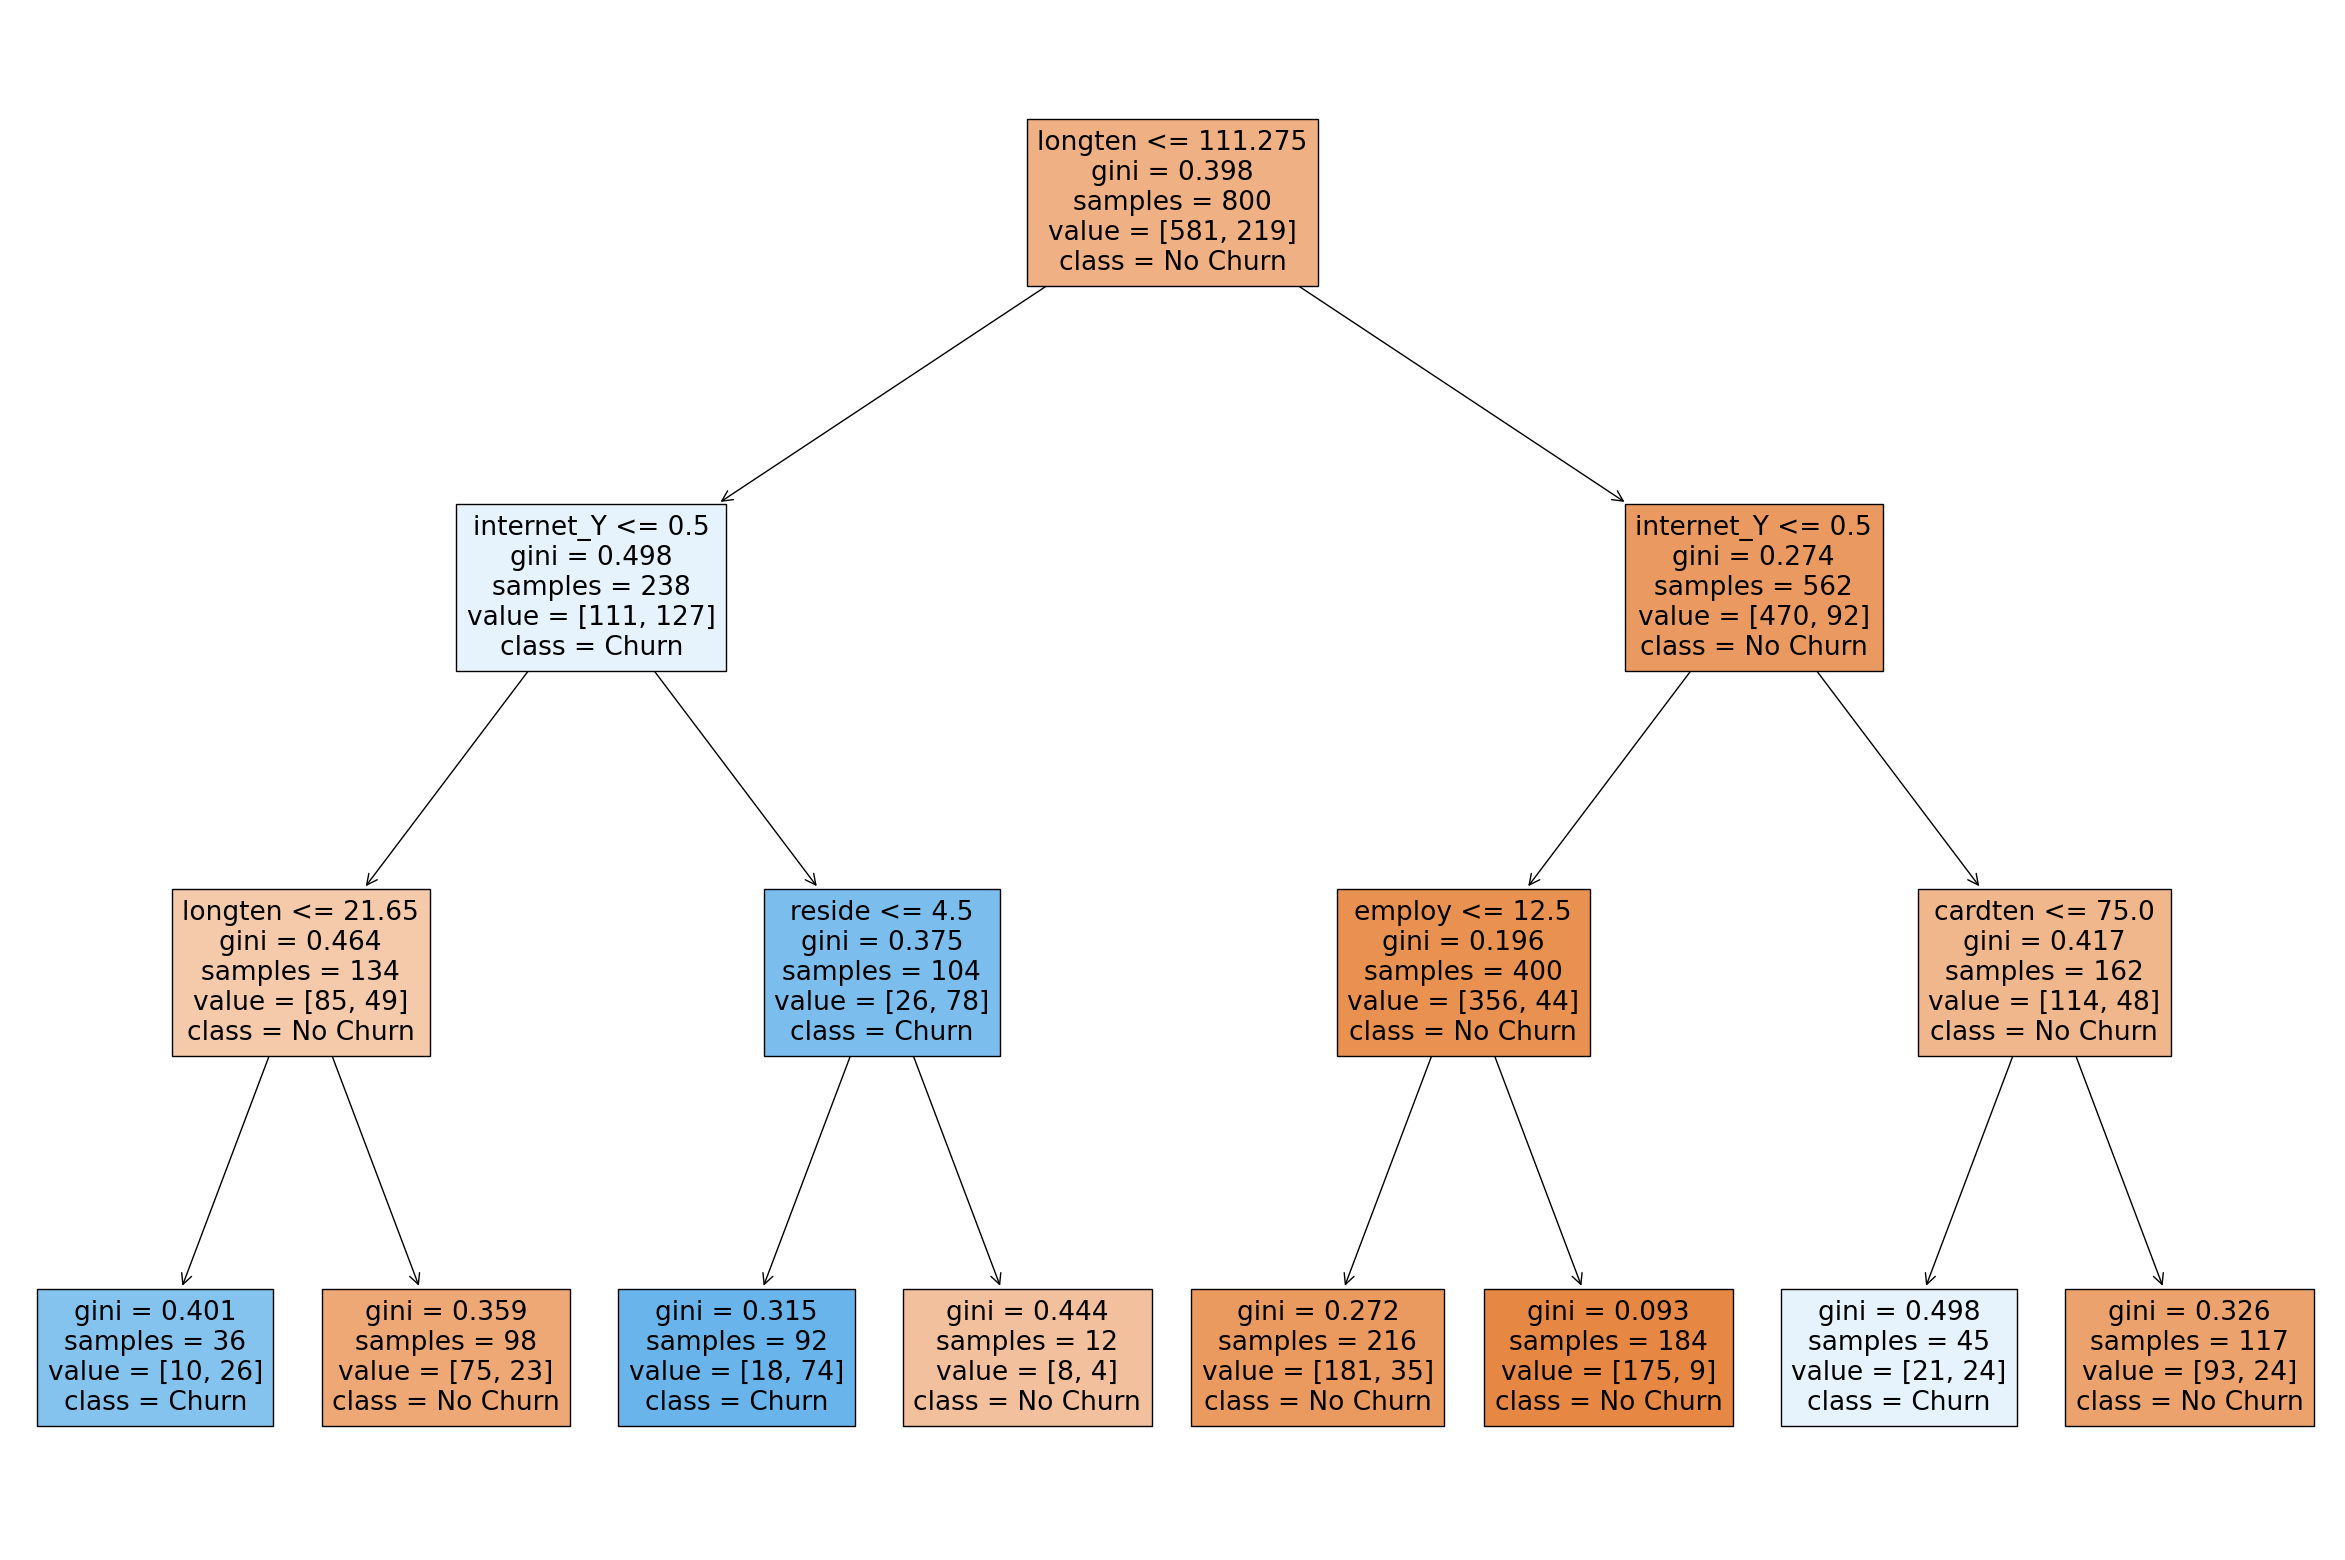

In [ ]:
fig = plt.figure(figsize=(30,20))

tree.plot_tree(dt_classifier,
          feature_names=list(X_train_encoded.columns),
          class_names=['No Churn', 'Churn'],
          filled=True)
plt.show()

**Step 27**: Display the text version of Decision tree

In [ ]:
print(tree.export_text(dt_classifier))

|--- feature_1035 <= 111.28
|   |--- feature_1031 <= 0.50
|   |   |--- feature_1035 <= 21.65
|   |   |   |--- class: Y
|   |   |--- feature_1035 >  21.65
|   |   |   |--- class: N
|   |--- feature_1031 >  0.50
|   |   |--- feature_1044 <= 4.50
|   |   |   |--- class: Y
|   |   |--- feature_1044 >  4.50
|   |   |   |--- class: N
|--- feature_1035 >  111.28
|   |--- feature_1031 <= 0.50
|   |   |--- feature_1022 <= 12.50
|   |   |   |--- class: N
|   |   |--- feature_1022 >  12.50
|   |   |   |--- class: N
|   |--- feature_1031 >  0.50
|   |   |--- feature_8 <= 75.00
|   |   |   |--- class: Y
|   |   |--- feature_8 >  75.00
|   |   |   |--- class: N



**RESULTS AND MODEL EVALUATION**

1.Model Prediction:
We use the trained decision tree classifier to make predictions on the test data.

2.Model Evaluation Metrics:
We evaluate the performance of the classifier using various metrics including accuracy, precision, recall, F1 score, and confusion matrix.

3.Feature Importance:
We analyze the feature importances to identify the variables that have the highest impact on predicting customer churn.

**Step 28**:Make predictions on testing data

In [ ]:
y_pred = dt_classifier.predict(X_test_encoded)

**Step 29**:Examine the evaluation results on testing data: confusion_matrix

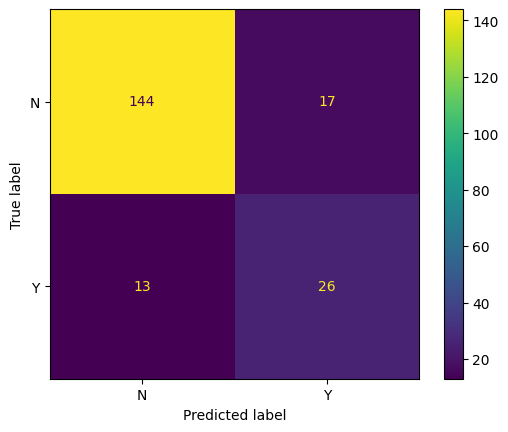

In [ ]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_classifier.classes_).plot()

**Step 30**:Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score from classification report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.92      0.89      0.91       161
           Y       0.60      0.67      0.63        39

    accuracy                           0.85       200
   macro avg       0.76      0.78      0.77       200
weighted avg       0.86      0.85      0.85       200



**Step 31**:Calculate the feature importances

In [ ]:
feature_importance = pd.DataFrame({'Feature': X_train_encoded.columns, 'Importance': dt_classifier.feature_importances_})

**Step 32**:Sort the features by importance in descending order

In [ ]:
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

**Step 33**:Display the top 5 features with the highest impact

In [ ]:
print("Top 5 features with highest impact:")
print(feature_importance.head(5))

Top 5 features with highest impact:
         Feature  Importance
1035     longten    0.595655
1031  internet_Y    0.258631
8        cardten    0.071571
1044      reside    0.048147
1022      employ    0.025995


**BALANCING THE DATA:**

The data is not balanced because the proportion of churned customers (churn = 'Y') is significantly lower than the proportion of non-churned customers (churn = 'N'). Specifically, the proportion of churned customers is approximately 25.8%, while the proportion of non-churned customers is approximately 74.2%.

If the data was not balanced, the several approaches we could take are:

**Undersampling the Majority Class**: This involves randomly removing samples from the majority class (non-churned customers) to balance the dataset. However, undersampling may result in loss of information from the majority class, potentially leading to reduced model performance.

**Oversampling the Minority Class**: This involves creating additional synthetic samples for the minority class (churned customers) to balance the dataset. Techniques such as Synthetic Minority Over-sampling Technique (SMOTE) can be used to generate synthetic samples based on the characteristics of existing minority class samples.

**Using Class Weights**: Many machine learning algorithms, including decision trees, support assigning higher weights to samples from the minority class during model training. This allows the algorithm to penalize misclassifications of the minority class more heavily, effectively addressing class imbalance.

**Choosing Evaluation Metrics Carefully**: When evaluating model performance, it's important to use appropriate metrics that account for class imbalance. Metrics such as precision, recall, F1-score, and the area under the ROC curve (AUC-ROC) are often more informative than accuracy when dealing with imbalanced datasets.


**OVERALL PERFORMANCE:**

Based on the evaluation metrics and the confusion matrix provided, the model exhibits moderate performance in predicting customer churn. It achieves an accuracy of approximately 85%, indicating that it correctly classifies 85% of all instances in the test dataset.

**Accuracy**: The model achieved an accuracy of approximately 85%, indicating that it correctly classified 85% of the instances in the test set.

**Precision**: The precision for predicting churn is approximately 60%, meaning that out of all the instances predicted as churned, 60% were actually churned customers.

**Recall (Sensitivity)**: The recall for predicting churn is approximately 67%, indicating that the model correctly identified 67% of the actual churned customers.

**F1-score**: The F1-score, which is the harmonic mean of precision and recall, is approximately 63%. It provides a balance between precision and recall, taking into account both false positives and false negatives.

**Confusion Matrix**: The confusion matrix shows the model's performance in classifying instances into true negatives, false positives, false negatives, and true positives. It provides a detailed breakdown of the model's predictions compared to the actual labels.


**Churn Prediction for "Yes" Cases**:

For cases where the actual churn label is "Yes" (indicating that the customer churned)
Precision: Around 60% of the instances predicted as churners are true churners.
Recall (Sensitivity): Approximately 67% of all actual churners are correctly identified by the model.

F1 Score: The F1 score, a balanced measure of precision and recall, is around 63%.

**Churn Prediction for "No" Cases:**
For cases where the actual churn label is "No" (indicating that the customer did not churn)

True Negatives: Around 89% of instances are correctly classified as non-churners.
False Positives: Approximately 11% of instances are incorrectly classified as churners.

**CONCLUSION**

In this analysis, we employed machine learning techniques, specifically a decision tree classifier, to predict customer churn based on various customer attributes. We utilized Google Colab for our analysis and followed the standard data mining process, including data preprocessing, model development, and evaluation.

The decision tree classifier achieved reasonable performance metrics on the test dataset, with an accuracy of **85%**. The precision, recall, and F1-score for predicting churn were **0.60, 0.67, and 0.63**, respectively. While these metrics indicate the classifier's effectiveness in identifying potential churners, there is room for improvement, especially in **precision**.

Feature Importance:
Analyzing feature importances revealed the most influential factors in predicting churn. The top five features with the highest impact were **reside, cardten, internet, longten, and employ**. This insight can help businesses prioritize retention efforts and allocate resources more effectively.


**BUSINESS APPLICATION:**

Despite its limitations, the decision tree classifier provides a valuable tool for businesses to predict customer churn and implement proactive retention strategies. By identifying potential churners in advance, businesses can tailor their efforts to retain customers and improve overall satisfaction. However, it's essential to supplement the classifier's predictions with domain knowledge and human judgment for optimal decision-making.

The strengths and weaknesses of the approach are as follows:

**STRENGTHS:**

**Interpretability**: Decision trees offer intuitive and interpretable models, allowing businesses to understand the factors driving customer churn.

**Feature Importance**: By analyzing feature importances, we can identify the most influential variables in predicting churn, providing actionable insights for business decision-making.

**Scalability**: The decision tree classifier can handle large datasets and scale well with additional data.

**WEAKNESSES:**

**Overfitting**: Decision trees are prone to overfitting, especially with complex datasets, which may result in poor generalization to unseen data.

**Limited Complexity**: Decision trees have limited expressive power compared to more complex models like ensemble methods or neural networks, potentially leading to suboptimal performance on certain datasets.

**Handling Categorical Variables**: While we converted categorical variables to dummy variables for modeling, other encoding techniques or feature engineering methods could potentially improve model performance.

In [ ]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/Assignment.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Assignment.ipynb to html
[NbConvertApp] Writing 1269532 bytes to /content/drive/MyDrive/Colab Notebooks/Assignment.html
